In [73]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm.notebook import tqdm
import yfinance as yf


from RobertaSentiment import RobertaSentimentModel
from prices import read_stock_prices
from plotter import plot

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
roberta = RobertaSentimentModel()

In [7]:
tweets = ['$AMC and $GME to the moon! Ryan Cohen can now put my plan into play.', 
      "$TSLA is going to crash hard."]
roberta.score(tweets)

[{'negative_score': 0.0019502358045428991,
  'neutral_score': 0.1953500360250473,
  'positive_score': 0.8026998043060303,
  'total_score': 0.8007495685014874},
 {'negative_score': 0.7156113982200623,
  'neutral_score': 0.25811561942100525,
  'positive_score': 0.026272978633642197,
  'total_score': -0.6893384195864201}]

In [8]:
sentiment = []
stocks = ["AAPL", "TSLA", "PLTR"]

for stock in stocks:
    tweet_paths = glob.glob(f'tweets3/{stock}*')
    tpaths = tqdm(sorted(tweet_paths))
    for path in tpaths:
        tweets_df = pd.read_csv(path) 
        content = tweets_df['content']

        date_str = path[13:23]  # TODO: use regex, this is fragile

        scores = roberta.score(content.to_numpy())
        mean_total_score = np.mean([score["total_score"] for score in scores])    
        sentiment.append({"Date": date_str, "Stock": stock, "Sentiment": mean_total_score})
        tpaths.set_description(f"{path}: {mean_total_score:0.2f}")

  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

In [9]:
df = pd.DataFrame(data=sentiment)
df['Date'] = df['Date'].astype('datetime64[ns]')

In [75]:
price_data = read_stock_prices(stocks)

In [63]:
stock_df = pd.merge(df, price_data,  how='left', on = ['Date','Stock'])
stock_df.dropna(inplace = True)
stock_df

,Date,Stock,Sentiment,Close
3,2021-01-04,AAPL,0.185867,128.997803
4,2021-01-05,AAPL,0.255921,130.592697
5,2021-01-06,AAPL,0.187538,126.196747
6,2021-01-07,AAPL,0.267454,130.502991
7,2021-01-08,AAPL,0.243698,131.629379
...,...,...,...,...
341,2021-04-20,PLTR,0.204555,21.780001
342,2021-04-21,PLTR,0.297104,22.629999
343,2021-04-22,PLTR,0.229362,22.860001
344,2021-04-23,PLTR,0.265378,23.410000


Correlation: 0.41


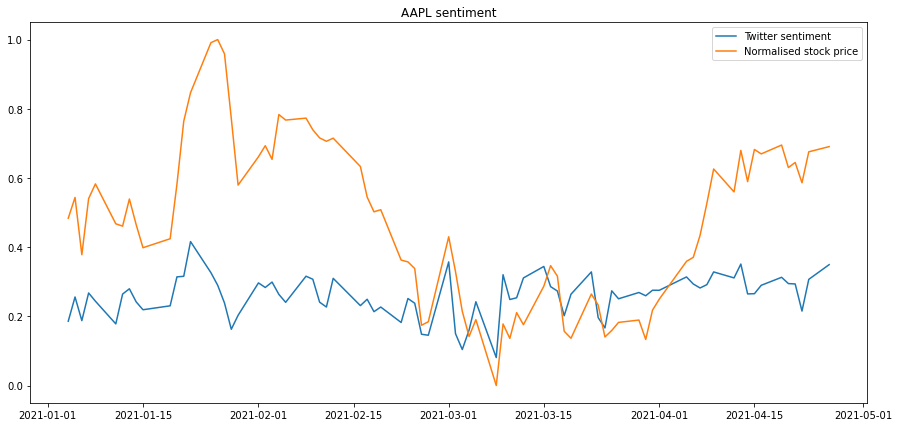

In [76]:
import warnings
warnings.filterwarnings('ignore')

plot(stock_df, "AAPL", save_figure=True)

Correlation: 0.26


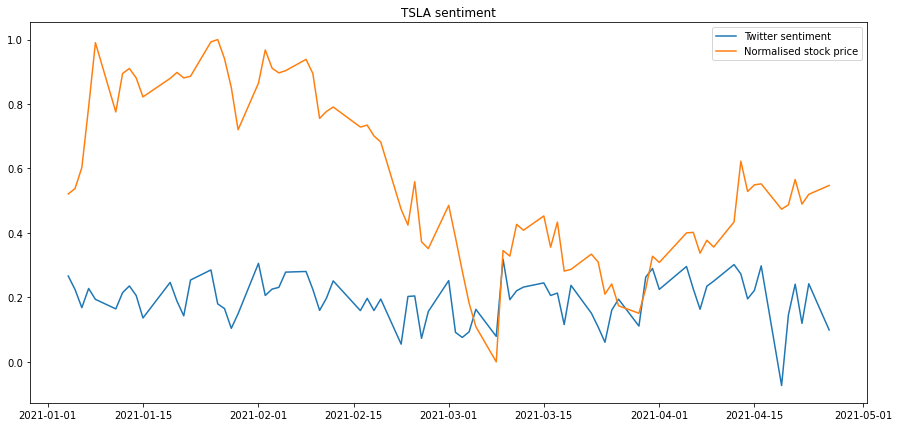

In [77]:
plot(stock_df, "TSLA", save_figure=True)

Correlation: 0.25


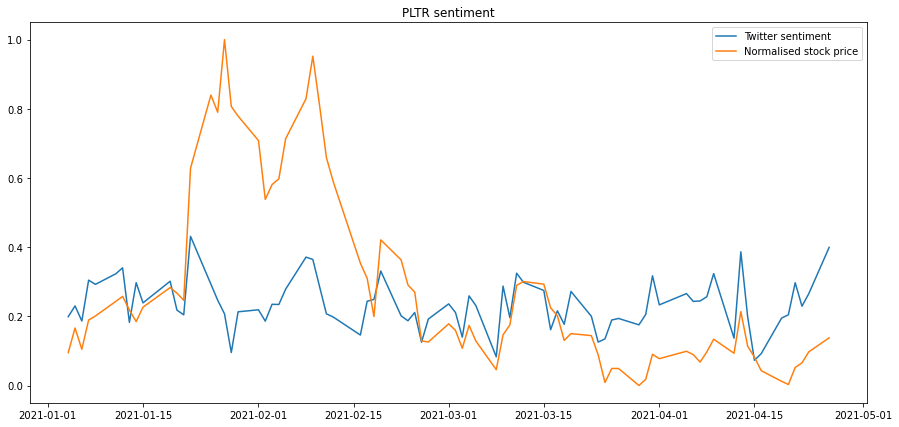

In [78]:
plot(stock_df, "PLTR", save_figure=True)